<a href="https://colab.research.google.com/github/MATHSMADHA/Unlocking-Paddy-Heritage-Deep-Learning-for-Feature-Extraction-and-Recognition/blob/main/Morphological_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import cv2
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
#import cv2
#import numpy as np
#from matplotlib import pyplot as plt
#from scipy import ndimage
#from skimage import measure, color, io
#from google.colab.patches import cv2_imshow

img1 = cv2.imread("/content/P9.jpg")
img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

In [ ]:
pixels_to_um = 0.5 # 1 pixel = 500 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)


In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)


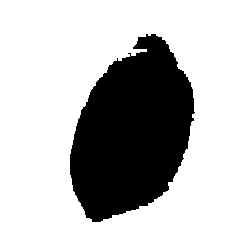

-1

In [ ]:
cv2_imshow(opening)
cv2.waitKey(0)

In [ ]:
regions = measure.regionprops(opening, intensity_image=thresh)


In [ ]:
regions

In [ ]:
propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']


output_file = open('image_measurements9.csv', 'w')
output_file.write('Grain #' + "," + "," + ",".join(propList) + '\n') #join strings in array by commas,
#First cell to print grain number
#Second cell blank as we will not print Label column

grain_number = 1
for region_props in regions:
    output_file.write(str(grain_number) + ',')
    #output cluster properties to the excel file
#    output_file.write(str(region_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'):
            to_print = region_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'):
            to_print = region_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = region_props[prop]*pixels_to_um
        else:
            to_print = region_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')
    grain_number += 1

output_file.close()   #Closes the file, otherwise it would be read only.